### Exercise 1.1 KNN classifier on shuffled MNIST data
Run mnist1NNdemo and verify that the misclassification rate (on the first 1000 test cases) of MNIST of a
1-NN classifier is 3.8%. (If you run it all on all 10,000 test cases, the error rate is 3.09%.) Modify the code
so that you first randomly permute the features (columns of the training and test design matrices), as in
shuffledDigitsDemo, and then apply the classifier. Verify that the error rate is not changed.

In [331]:
# setup the backend for matplotlib to inline
%matplotlib inline

import numpy as np
# import matplotlib to plot image
import matplotlib.pyplot as plt
# import sklearn to load mnist data set 
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [332]:
# learn how to use matplotlib to load test image 
# although this is not related to the classifer procedure, it is valuable to get familiar with the matplotlib

# load mnist dataset
digits = datasets.load_digits()

# digits is a (n_samples, n_features) array
display(f"n_samples = {len(digits.data)} and n_features = {len(digits.data[0])}")

'n_samples = 1797 and n_features = 64'

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

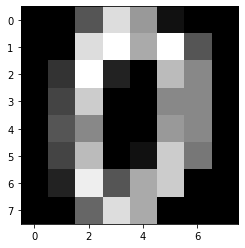

In [333]:
# use the first image as the sample image
sample_image = np.array(digits.data[0]).reshape(8, 8)
sample_image.shape
display(sample_image)
plt.imshow(sample_image, cmap='gray')

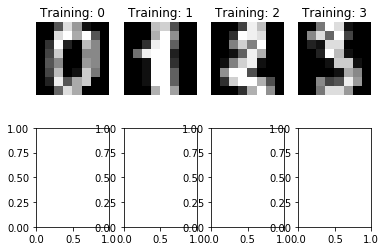

In [334]:
# look at the first 4 images
# here use the digits.images directly
fig, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images[:4], digits.target[:4]))
for ax, (image, label) in zip(axes[0], images_and_labels):
    ax.set_axis_off()
    ax.imshow(image, cmap='gray', interpolation='nearest')
    ax.set_title(f'Training: {label}')

In [335]:
# function to get the predictions
def get_predictions(X_train, X_test, y_train, y_test):
    # calculate the squared vector norms
    train_norms = np.array([X_train[i, :].dot(X_train[i, :]) for i in range(X_train.shape[0])])
    train_norms = np.broadcast_to(train_norms, (X_test.shape[0], train_norms.shape[0]))

    # calculate the distance for each X_test, ignore the squared vector norms for X_test[i] since they are same
    distances = train_norms - 2 * X_test.dot(X_train.T)
    # get the prediction as the label which has the minimum distance from the test input
    return y_train[np.argmin(distances, axis=1)]

In [336]:
%%timeit -r1 -n1
# collect errors using 1000 subsets
errors = []
for i in range(1): 
    # split data into train and test subsets
    X_train, X_test, y_train, y_test = train_test_split(
        digits.data, digits.target, test_size=0.5, shuffle=True
    )
    predictions = get_predictions(X_train, X_test, y_train, y_test)
    error = 1 - np.mean(np.equal(predictions, y_test))
    errors.append(error)

print(f"error rate is {np.mean(errors)}")

error rate is 0.016685205784204626
136 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Exercise 1.3 CV for KNN
Use knnClassifyDemo to plot the CV estimate of the misclassification rate on the test set. Compare this
to Figure 1.21(a). Discuss the similarities and differences to the test error rate.

In [345]:
import os
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score

# define the DATA_DIR
DATA_DIR = "../data"

def load_data():
    train_file = os.path.join(DATA_DIR, "knnClassify3c", "knnClassify3cTrain.txt")
    test_file = os.path.join(DATA_DIR, "knnClassify3c", "knnClassify3cTest.txt")
    # load array from txt file
    # define the structure date type for array item in txt is important
    train = np.loadtxt(
        train_file,
        dtype=[("X_train", ("f8", 2)), ("y_train", ("f8", 1))]
    )
    test = np.loadtxt(
        test_file,
        dtype=[("X_test", ("f8", 2)), ("y_test", ("f8", 1))]
    )
    return train["X_train"], train["y_train"], test["X_test"], test["y_test"]

X_train, y_train, X_test, y_test = load_data()

/usr/local/lib/python3.7/site-packages/numpy/lib/npyio.py:1100: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  dtype = np.dtype(dtype)


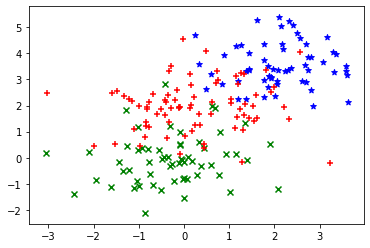

In [338]:
# plot train fig 
plt.figure()
markers = '*x+'
colors = 'bgr'
y_unique = np.unique(y_train)
for i in range(len(y_unique)):
    plt.scatter(
        # np.where(y_train == y_unique[i]) and y_train == y_unique[i] are same
        X_train[np.where(y_train == y_unique[i]), 0],
        X_train[y_train == y_unique[i], 1],
        marker=markers[i],
        color=colors[i]
    )

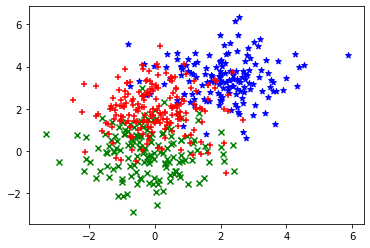

In [339]:
# plot test fig
plt.figure()
for i in range(len(y_unique)):
    plt.scatter(
        X_test[np.where(y_test == y_unique[i]), 0],
        X_test[y_test == y_unique[i], 1],
        marker=markers[i],
        color=colors[i]
    )

In [340]:
# generate all coordinates within the plane [min, max]
x = np.linspace(np.min(X_test[:, 0]), np.max(X_test[:, 1]), 200)
y = np.linspace(np.min(X_test[:, 1]), np.max(X_test[:, 1]), 200)
# xx is the array of the x coordinate of the generated mesh grid
# yy is the array of the y coordinate of the generated mesh grid
xx, yy = np.meshgrid(x, y)
# ravel makes [[1, 2], [3, 4]] => [1, 2, 3, 4]
# c_ create the (x, y) coordinate array based on x array and y array
xy = np.c_[xx.ravel(), yy.ravel()]
display(f"The shape of xy is {xy.shape}")
display(xy)

'The shape of xy is (40000, 2)'

array([[-3.2885    , -2.8775    ],
       [-3.23999899, -2.8775    ],
       [-3.19149799, -2.8775    ],
       ...,
       [ 6.26619799,  6.3632    ],
       [ 6.31469899,  6.3632    ],
       [ 6.3632    ,  6.3632    ]])

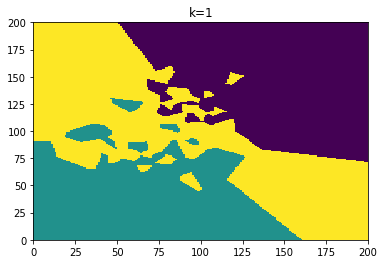

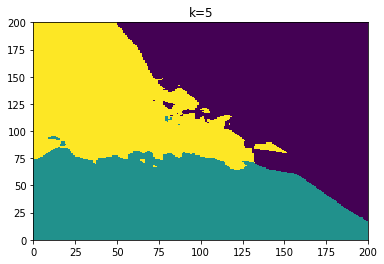

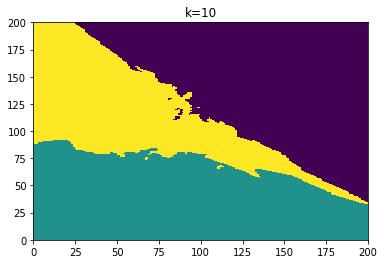

In [341]:
# use the knn model to predict
for k in [1, 5, 10]:
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, y_train)
    plt.figure()
    y_predicted = knn.predict(xy)
    # there are total 200 * 200 results
    plt.pcolormesh(y_predicted.reshape(200, 200))
    plt.title(f"k={k}")

Text(0, 0.5, 'misclassification rate')

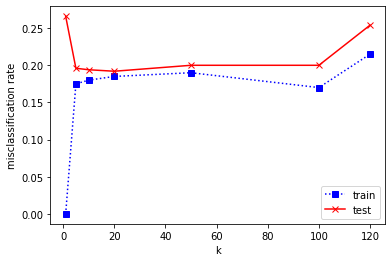

In [342]:
# plot train err and test err with different k
ks = [1, 5, 10, 20, 50, 100, 120]
train_errs = []
test_errs = []
for k in ks:
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_errs.append(1 - knn.score(X_train, y_train))
    test_errs.append(1 - knn.score(X_test, y_test))
plt.figure()
plt.plot(ks, train_errs, "bs:", label="train")
plt.plot(ks, test_errs, "rx-", label="test")
plt.legend()
plt.xlabel("k")
plt.ylabel("misclassification rate")

Text(0.5, 1.0, '5-fold cross validation, n-train = 200')

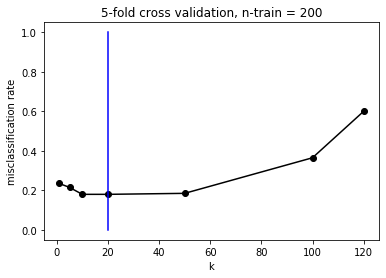

In [343]:
# cross validation (cross validation is done by train set only)
scores = []
for k in ks:
    knn = KNN(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(1 - score.mean())
plt.figure()
plt.plot(ks, scores, "ko-")
min_k = ks[np.argmin(scores)]
plt.plot([min_k, min_k], [0, 1.0], "b-")
plt.xlabel('k')
plt.ylabel('misclassification rate')
plt.title('5-fold cross validation, n-train = 200')


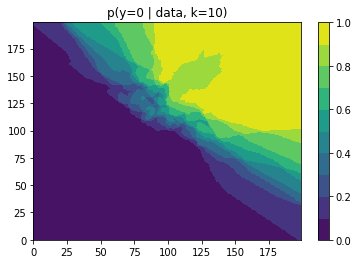

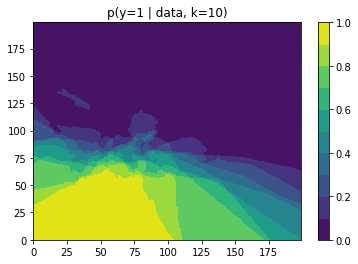

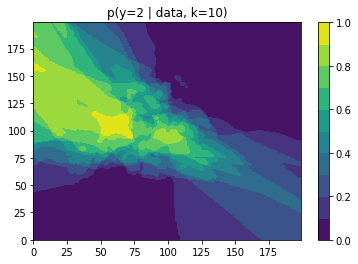

In [344]:
knn = KNN(n_neighbors=10)
knn.fit(X_train, y_train)
xy_predict = knn.predict_proba(xy)
xy_predict[0]
levels = np.arange(0, 1.01, 0.1)
for i in range(3):
    plt.figure()
    plt.contourf(xy_predict[:, i].ravel().reshape(200, 200), levels)
    plt.colorbar()
    plt.title("p(y=%s | data, k=10)" % (i))
plt.show()